# CHAPTER 5 - QAOA: Quantum Approximate Optimization Algorithm - Qiskit Code



*Note*: You may skip the following three cells if you have alredy installed the right versions of all the libraries mentioned in *Appendix D*. This will likely NOT be the case if you are running this notebook on a cloud service such as Google Colab.

In [ ]:
pip install qiskit==0.39.2

In [ ]:
pip install pylatexenc==2.10

In [ ]:
pip install qiskit-optimization==0.4.0

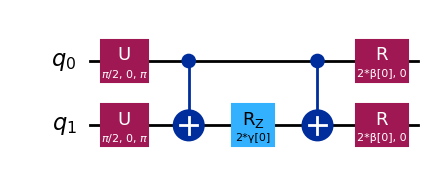

In [9]:
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
#from qiskit import Aer /# depreciado
from qiskit.providers.basic_provider import BasicProvider

#from qiskit.primitives import Sampler # Depreciado Usar o de baixo
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from scipy.optimize import minimize
import matplotlib
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
#from qiskit_aer.primitives import Sampler

from qiskit.circuit.library import QAOAAnsatz

from qiskit.quantum_info import Operator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

seed = algorithm_globals.random_seed = 1234
#H1 = Z^Z # Define Z_0Z_1 # depreciado
H1 = Pauli('ZZ') # Define Z_0Z_1

#SparsePauliOp("ZI")

#optimizer = COBYLA()
#sampler = Sampler()
#qaoa = QAOA(sampler, optimizer)

ansatz = QAOAAnsatz(H1) # uma camada p=1

ansatz.decompose().decompose().decompose().draw("mpl",style="iqp")
#ansatz.decompose().draw(output="mpl")

#value_circuit = qaoa.compute_minimum_eigenvalue(H1) ## Calcula a minimizacao 
#print(value_circuit)

#circuit.draw(output="mpl")

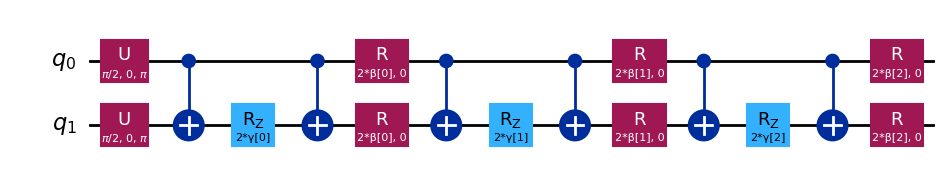

In [10]:
ansatz = QAOAAnsatz(H1,reps=3) # 3 camadas p=3
ansatz.decompose().decompose().decompose().draw("mpl")

In [ ]:
#qaoa = QAOA(reps = 2) # depreciado
#circuit = qaoa.construct_circuit([1,2,3,4],H1)[0] # depreciado
#circuit.decompose().decompose().draw(output="mpl") # depreciado

In [11]:
#seed = 1234
#algorithm_globals.random_seed = seed
#quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), 
#                   seed_simulator=seed, seed_transpiler=seed, 
#                   shots = 10)
#qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
#result = qaoa.compute_minimum_eigenvalue(H1)
#print(result)

# O codigo acima nao funciona mais foi substituido pelo trecho abaixo 
seed = 1234
np.random.seed(seed)
backend = AerSimulator(seed_simulator=seed)
#backend = sim= AerSimulator(device = 'GPU')
#service = QiskitRuntimeService()
#backend = service.least_busy(operational=True, simulator=False)
#print(backend)

optimizer = COBYLA()
sampler = Sampler(backend)
#H_op = Operator(H1)
#op = SparsePauliOp(['ZZ'], coeffs=[1.0])
#print(H1)
#H1 = SparsePauliOp(H1)

pm = generate_preset_pass_manager(backend=backend)
print("Hamiltoniano H1 criado:")
print(H1)
# Iniciando os parametros β e γ com [1,2,3,4]
# β1 = 1, β2 = 2, γ1 = 3, and γ2 = 4
qaoa = QAOA(sampler, optimizer, reps=2, transpiler=pm, initial_point=[1,2,3,4])
value_circuit = qaoa.compute_minimum_eigenvalue(H1) ## Calcula a minimizacao 
print(value_circuit)

Hamiltoniano H1 criado:
ZZ
{   'aux_operators_evaluated': None,
    'best_measurement': {   'bitstring': '10',
                            'probability': 0.4912109375,
                            'state': 2,
                            'value': np.complex128(-1+0j)},
    'cost_function_evals': np.int64(31),
    'eigenstate': {'01': 0.5087890625, '10': 0.4912109375},
    'eigenvalue': np.float64(-1.0),
    'optimal_circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fbab6a20890>,
    'optimal_parameters': {   ParameterVectorElement(γ[0]): np.float64(4.113197825905555),
                              ParameterVectorElement(γ[1]): np.float64(5.000510885529034),
                              ParameterVectorElement(β[1]): np.float64(2.9685909789705023),
                              ParameterVectorElement(β[0]): np.float64(1.032329033047559)},
    'optimal_point': array([1.03232903, 2.96859098, 4.11319783, 5.00051089]),
    'optimal_value': np.float64(-1.0),
    'optimizer_e

In [12]:
# Medindo alguns resultados do que foi otimizado acima, ou seja iniciando os parametroes com o 
# resultado da otimizacao encontrado quand se executa o codio anterior. Somente para conferencia
qaoa = QAOA(sampler, optimizer, reps=2, transpiler=pm, initial_point=[1.08949828, 3.04357633, 4.01228639, 4.94278785])

value_circuit = qaoa.compute_minimum_eigenvalue(H1) ## Calcula a minimizacao 
print(value_circuit)

{   'aux_operators_evaluated': None,
    'best_measurement': {   'bitstring': '10',
                            'probability': 0.4912109375,
                            'state': 2,
                            'value': np.complex128(-1+0j)},
    'cost_function_evals': np.int64(25),
    'eigenstate': {'01': 0.5087890625, '10': 0.4912109375},
    'eigenvalue': np.float64(-1.0),
    'optimal_circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fbb06e0a5d0>,
    'optimal_parameters': {   ParameterVectorElement(γ[0]): np.float64(4.01228639),
                              ParameterVectorElement(β[1]): np.float64(3.04357633),
                              ParameterVectorElement(γ[1]): np.float64(4.94278785),
                              ParameterVectorElement(β[0]): np.float64(1.08949828)},
    'optimal_point': array([1.08949828, 3.04357633, 4.01228639, 4.94278785]),
    'optimal_value': np.float64(-1.0),
    'optimizer_evals': None,
    'optimizer_result': <qiskit_algorithms.

*Note*: In the following cell, you need to replace "1234" with your actual IBM token. Refer to *Appendix D* in the book for instructions on how to create an account and get your token. Be very careful not to disclose your token to anyone!

In [ ]:
ibm_token="1234"

In [ ]:
from qiskit import IBMQ

IBMQ.save_account(ibm_token)
provider = IBMQ.load_account()
program_id = "qaoa"

H1 = Z^Z
opt = COBYLA()
reps = 1
shots = 1024

runtime_inputs = {
    "operator": H1,
    "reps": reps,
    "optimizer": opt,
    "initial_point": [0,0],
    "use_swap_strategies": False
}

options = {"backend_name": "ibmq_belem"}

job = provider.runtime.run(program_id=program_id, 
      options=options, inputs=runtime_inputs)

In [ ]:
result = job.result()
print("Optimizer time", result['optimizer_time'])
print("Optimal value", result['optimal_value'])
print("Optimal point", result['optimal_point'])
print("Optimal state", result['eigenstate'])

In [ ]:
from qiskit_optimization.problems import QuadraticProgram

qp = QuadraticProgram()
qp.binary_var('x')
qp.binary_var('y')
qp.binary_var('z')

qp.minimize(linear = {'y':-1}, quadratic = {('x','y'):2, ('z','y'):-4})
qp.linear_constraint(linear = {'x':1, 'y':2, 'z':3}, 
    sense ="<=", rhs = 5)

print(qp.export_as_lp_string())

In [ ]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import NumPyMinimumEigensolver
np_solver = NumPyMinimumEigensolver()
np_optimizer = MinimumEigenOptimizer(np_solver)
result = np_optimizer.solve(qp)
print(result)

In [ ]:
from qiskit import Aer
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), 
    shots = 1024)
qaoa = QAOA(optimizer = COBYLA(), 
    quantum_instance=quantum_instance, reps = 1)  
qaoa_optimizer = MinimumEigenOptimizer(qaoa)
result = qaoa_optimizer.solve(qp)
print(result)

In [ ]:
print('Variable order:', [var.name for var in result.variables])
for s in result.samples:
    print(s)

In [ ]:
print(result.min_eigen_solver_result)


In [ ]:
from qiskit_optimization.converters import QuadraticProgramToQubo
qp_to_qubo = QuadraticProgramToQubo()
qubo = qp_to_qubo.convert(qp)
print(qubo.export_as_lp_string())

In [ ]:
H1, offset = qubo.to_ising()
print("The Hamiltonian is", H1)
print("The constant term is", offset)

In [ ]:
from qiskit_optimization.runtime import QAOAClient
from qiskit import IBMQ

provider = IBMQ.load_account()
qaoa_client = QAOAClient(provider=provider, 
                      backend=provider.get_backend("ibm_oslo"), reps=1)

qaoa = MinimumEigenOptimizer(qaoa_client)
result = qaoa.solve(qp)
print(result)

qiskit_runtime_service.__init__:WARNING:2026-02-03 10:28:50,231: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: Testes. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2026-02-03 10:28:50,701: Loading instance: Testes, plan: open
qiskit_runtime_service.backends:WARNING:2026-02-03 10:28:52,594: Using instance: Testes, plan: open


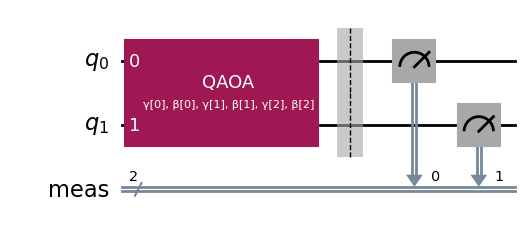

In [13]:
from qiskit_ibm_runtime import QiskitRuntimeService
ibm_token="1234"

# Save an IBM Quantum account and set it as your default account.

QiskitRuntimeService.save_account(channel="ibm_quantum_platform", token=ibm_token, set_as_default=True, overwrite=True) 
# Load saved credentials
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)

#circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)

ansatz.measure_all()
 
ansatz.draw("mpl")

#program_id = "qaoa"
#H1 = Z^Z
#opt = COBYLA()
#reps = 1
#shots = 1024

#runtime_inputs = {
#    "operator": H1,
#    "reps": reps,
#    "optimizer": opt,
#    "initial_point": [0,0],
#    "use_swap_strategies": False
#}

#options = {"backend_name": "ibm_marrakesh"}


#job = service.run(
#    program_id=program_id,
#    inputs=runtime_inputs,
#    options=runtime_options
#)

#print(f"Job ID: {job.job_id()}")
#print(f"Status: {job.status()}")

<IBMBackend('ibm_fez')>


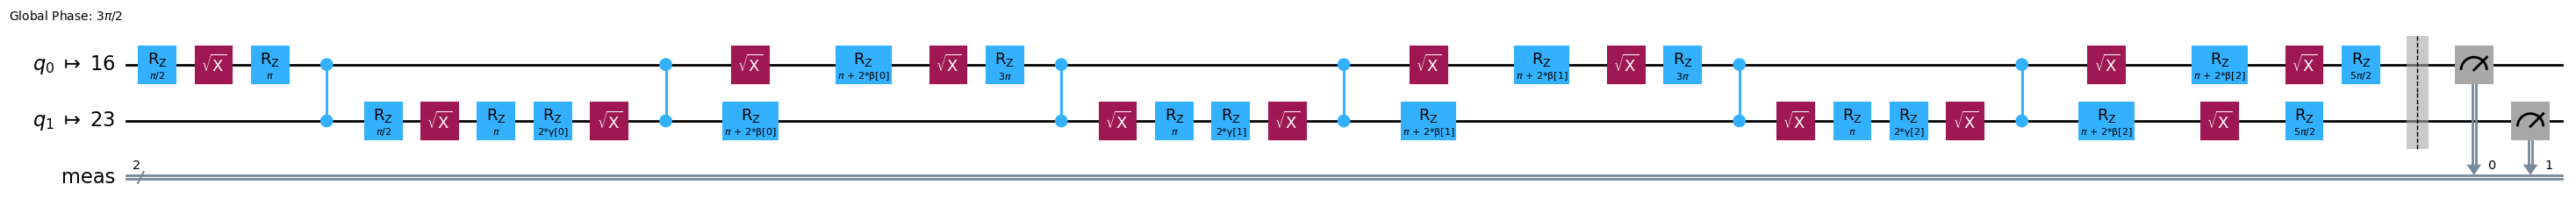

In [15]:
print(backend)
 
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
 
candidate_circuit = pm.run(ansatz)
candidate_circuit.draw("mpl", fold=False, idle_wires=False)

In [ ]:
initial_gamma = np.pi
initial_beta = np.pi / 2
init_params = [initial_beta, initial_gamma, initial_beta, initial_gamma, initial_beta, initial_gamma ]

def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)
 
    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])
 
    results = job.result()[0]
    cost = results.data.evs
 
    objective_func_vals.append(cost)
 
    return cost

objective_func_vals = []  # Global variable
#with Session(backend=backend) as session:
# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
estimator = Estimator(mode=backend)
estimator.options.default_shots = 10

# Set simple error suppression/mitigation options
estimator.options.dynamical_decoupling.enable = True
estimator.options.dynamical_decoupling.sequence_type = "XY4"
estimator.options.twirling.enable_gates = True
estimator.options.twirling.num_randomizations = "auto"
 
result = minimize(
    cost_func_estimator,
    init_params,
    args=(candidate_circuit, H1, estimator),
    method="COBYLA",
    tol=1e-2,
    )
print(result)    
    

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()